#### IRIS CASE STUDY FOR CLUSTERING

#### CANDIADTE NAME: ANAND PRATAP

#### TASK 2

## SPARK FOUNDATION 

#### Introduction:

In the realm of data analysis and pattern recognition, the IRIS dataset has long held a special place. A renowned benchmark for various machine learning and statistical techniques, the IRIS dataset offers a fascinating exploration into the world of botanical diversity. In this case study, we delve into the captivating realm of flowers, showcasing the remarkable power of clustering analysis to unlock hidden insights within this botanical treasure trove.

The IRIS dataset, collected by the British biologist and statistician Ronald A. Fisher in the 1930s, consists of measurements of sepals and petals from three species of Iris flowers - Setosa, Versicolor, and Virginica. This dataset serves as a perfect illustration of the potential of clustering analysis techniques to categorize and differentiate biological specimens based on their physical attributes. Through clustering, we aim to showcase how data-driven techniques can not only classify these flowers but also reveal the inherent structure and relationships that exist within the data, shedding light on the fascinating world of floral diversity.

In the following sections, we will embark on a journey of exploration, uncovering the magic that clustering can work when applied to the IRIS dataset. We will demonstrate how clustering algorithms can be leveraged to distinguish between these Iris species, providing a valuable illustration of the broader applications of clustering analysis in various fields of science and industry.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco







#### 1.Reading and understanding the Data set:

In [1]:
## Import the Library 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import tree 
  
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
  
import warnings 
warnings.filterwarnings('ignore')

In [2]:
## Reading the dataset

Iris= pd.read_csv('Iris.csv')
print (Iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
Iris.shape

(150, 6)

In [6]:
Iris.isnull().sum()



Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### EDA




In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
print(iris.data.shape)

(150, 4)


In [13]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


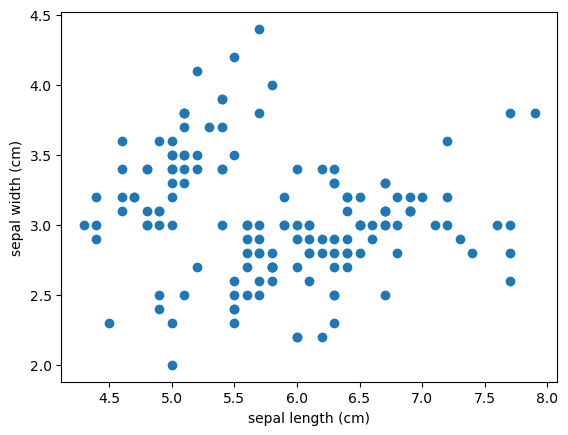

In [14]:
plt.scatter(iris.data[:, 0], iris.data[:, 1])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

#### Finally, it may be necessary to preprocess the data before performing cluster analysis. This could involve scaling the data to ensure that all attributes are on the same scale, or normalizing the data to ensure that all attributes have the same range. Preprocessing techniques will depend on the clustering algorithm being used, so we’ll do this later.

#### DATA PREPROCESSING BEFORE CLUSTERING

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)

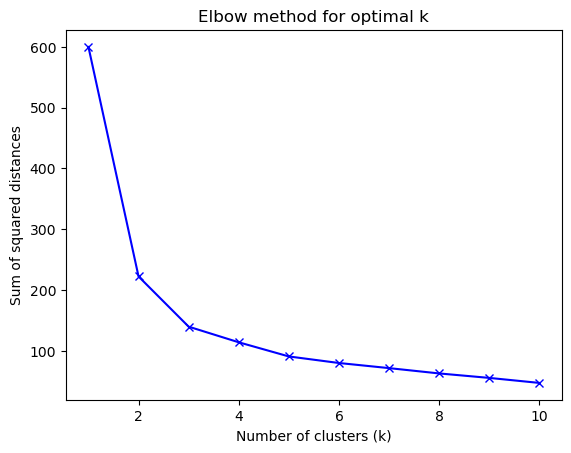

In [17]:
from sklearn.cluster import KMeans
import numpy as np

# Calculate sum of squared distances for k values ranging from 1 to 10
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

#### APPLYING THE ALGORITHM

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [19]:
from sklearn.decomposition import PCA

# Calculate first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

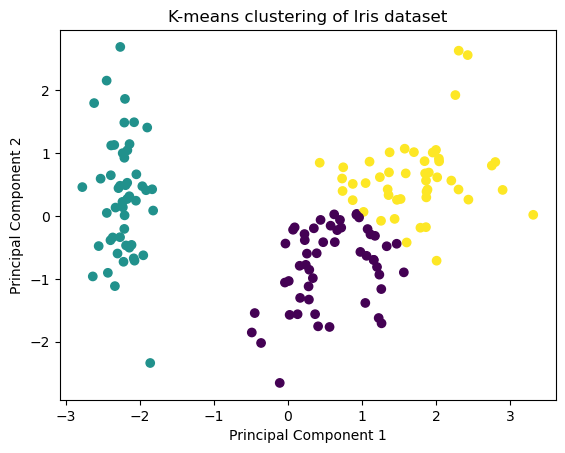

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means clustering of Iris dataset')
plt.show()

#### FINETUNING THE CLASSIFICATION:

In [21]:
## CALCULATING THE silhouette_score :

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.45994823920518635


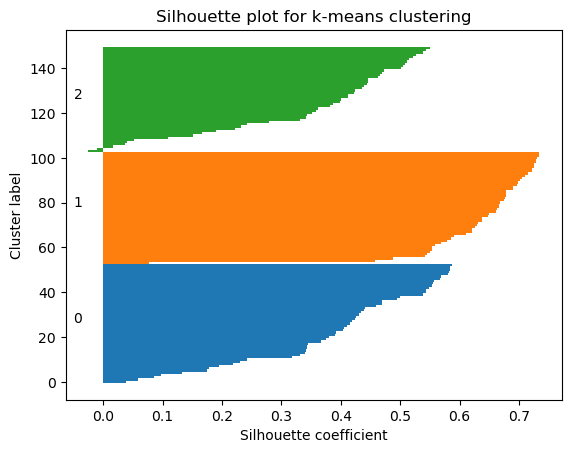

In [22]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Calculate silhouette coefficients for each data point
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# Plot silhouette plot
y_lower, y_upper = 0, 0
for i in range(kmeans.n_clusters):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for k-means clustering")
plt.show()

In [23]:
for i in range(kmeans.n_clusters):
    print("Cluster", i)
    print("Number of data points:", len(X[kmeans.labels_ == i]))
    print("Mean:", np.mean(X[kmeans.labels_ == i], axis=0))
    print("Standard deviation:", np.std(X[kmeans.labels_ == i], axis=0))
    print("")

Cluster 0
Number of data points: 53
Mean: [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
Standard deviation: [0.48666241 0.57986372 0.31550929 0.40594943]

Cluster 1
Number of data points: 50
Mean: [-1.01457897  0.85326268 -1.30498732 -1.25489349]
Standard deviation: [0.42281163 0.86382391 0.0977141  0.13732713]

Cluster 2
Number of data points: 47
Mean: [1.13597027 0.08842168 0.99615451 1.01752612]
Standard deviation: [0.58812089 0.59680897 0.35875065 0.43079594]



#### FINAL NOTE:

#### We can conclude the the same as mentioned in the plots that we have 3 cluster having diifferent attributed for the mentioned data set.